## Python Programming for Finance
Материал из лекций "Intro and Getting Stock Price Data - Python Programming for Finance" от sentdex
 https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ

(Intro and Getting Stock Price Data - Python Programming for Finance p.1)

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
#from matplotlib.mpl_finance import candlestick_ohlc
import  matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime as dt
import os
import pandas_datareader.data as web
#import beautifulsoup4

style.use('ggplot')
start=dt.datetime(2000,1,1)
end=dt.datetime(2016,12,31)

In [9]:
df=web.DataReader('TSLA','yahoo',start,end)

In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600


In [11]:
df.to_csv('tesla.csv')

In [12]:
df=pd.read_csv('tesla.csv',parse_dates=True,index_col=0)

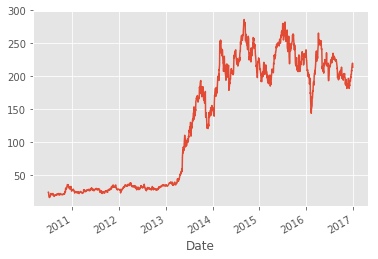

In [13]:
df['Adj Close'].plot()
plt.show()

### Создаем 100-дневную скользящую среднюю
(Basic Stock data Manipulation - Python Programming for Finance p.3)

In [14]:
df['100ma']=df['Adj Close'].rolling(window=100,min_periods=0).mean()
#min_periods=0 - Начинаем рассчитывать с первого значения таблицы. Если не указывать этот параметр
#то в первых 99 полях будет значение NaN и придется обнулять:
#df.dropna(inplace=True)

In [15]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2016-12-23,208.000000,213.449997,207.710007,213.339996,213.339996,4662900,202.6190
2016-12-27,214.880005,222.250000,214.419998,219.529999,219.529999,5915700,202.5082
2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500,202.4053
2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900,202.2905
2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600,202.1366


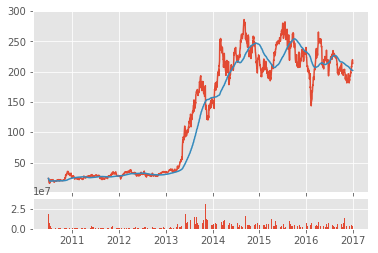

In [16]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])
plt.show()

## Делаем resample и готовим данные для построения графика свечей
(More stock manipulations - Python Programming for Finance p.4)

In [17]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [18]:
#Меняем индекс с метки времени на обычный порядковый
df_ohlc.reset_index(inplace=True)

In [19]:
#Преобразуем время в mdates формат (типа unixtimestamp) для использования в matplotlib.finance.candelstick_ohlc
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [20]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


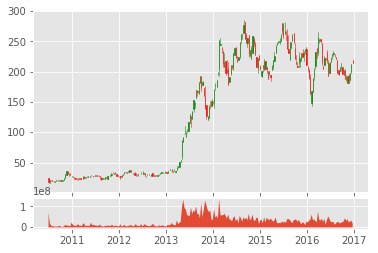

In [21]:
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date() #использование mdates.date2num для отображения дат в matplotlib.finance.candlestick_ohlc 
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g') #Рисуем свечи
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0) #Рисуем график объема
plt.show()

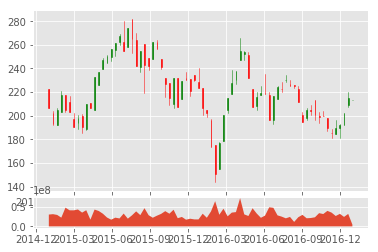

In [22]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
start=dt.datetime(2015,1,1)
end=dt.datetime(2016,12,31)
df=web.DataReader('TSLA','yahoo',start,end)
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date() #использование mdates.date2num для отображения дат в matplotlib.finance.candlestick_ohlc 
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g') #Рисуем свечи
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0) #Рисуем график объема
plt.show()

## Получение списка компаний S&P500
(Automating getting the S&P 500 list - Python Programming for Finance p.5)
https://www.youtube.com/watch?v=C--57BP79EM&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=5

In [28]:
#conda install beautifulsoup4
import bs4 as bs
#conda install lxml
#import lxml
import pickle
import requests

In [34]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    #soup = bs.BeautifulSoup(resp.text, "lxml")
    soup = bs.BeautifulSoup(resp.text,"html5lib")
    table = soup.find('table',{'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
    return tickers[1:4]

save_sp500_tickers()

['ABT', 'ABBV', 'ACN']

## Загрузить данные компаний S&P500
Getting all company pricing data in the S&P 500 - Python Programming for Finance p.6 (https://www.youtube.com/watch?v=baCAFPHb1o4&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=6)

In [39]:
def get_data_from_yaho(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
    
    #for ticker in tickers:
    for ticker in tickers[:5]: #Загрузить только 5 компаний
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker,'yahoo',start,end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print("Already have {}".format(ticker))
            
get_data_from_yaho()

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ACN
ATVI


In [40]:
import os
if not os.path.exists('test'):
    os.makedirs('test')

Done:
Getting all company pricing data in the S&P 500 - Python Programming for Finance p.6

test test